# Euklidsche Transformationen in homogenen Koordinaten

## Bibliotheken

### importiert

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as pl

### selbst geschrieben

In [3]:
def Cat (*p):
    return np.concatenate (p, axis = 1)

In [4]:
def Curve (zmin, zmax, *p):
    q = Cat (*p)
    c = (q [2] - zmin) / (zmax - zmin)
    pl.plot (q [0], q [1], color = 'black', linewidth = 0.3)

In [5]:
def Iso ():
    pl.axis ('scaled')

In [6]:
def Plot3 (pp):
    xy = np.stack ((pp [0], pp [1], pp [2]), axis = 0)
    xz = np.stack ((pp [0], pp [2], pp [1]), axis = 0)
    yz = np.stack ((pp [1], pp [2], pp [0]), axis = 0)
    fig = pl.figure (figsize = (15, 5))
    fig.add_subplot (1, 3, 1); pl.title ('xy'); Wireframe (xy); Iso()
    fig.add_subplot (1, 3, 2); pl.title ('xz'); Wireframe (xz); Iso()
    fig.add_subplot (1, 3, 3); pl.title ('yz'); Wireframe (yz); Iso()

In [7]:
def Transform (A, pp):
    return np.tensordot (A, pp, axes = 1)

In [8]:
def Vec3 (x, y, z):
    return np.array ([[x], [y], [z]])

In [9]:
def Vec4 (x, y, z):
    return np.array ([[x], [y], [z], [1]])

In [10]:
def Wireframe (p):
    z = p [2, :, :]; zmin = np.min (z); zmax = np.max (z)
    for i in range (p.shape [1]):
        Curve (zmin, zmax, p [:, i, :])
    for k in range (p.shape [2]):
        Curve (zmin, zmax, p [:, :, k])

## 3D-Geometrie erzeugen

In [11]:
def F (u, v):
    cu = np.cos (u); su = np.sin (u)
    cv = np.cos (v); sv = np.sin (v)
    x = 3 * cu * sv
    y = 2.5 * su * sv
    z = 2.0 * cv
    f = np.stack ((x, y, z, z - z + 1), axis = 0)
    return f

In [12]:
def Table (F, umin, umax, unum, vmin, vmax, vnum):
    u = np.linspace (umin, umax, unum)
    v = np.linspace (vmin, vmax, vnum)
    uu, vv = np.meshgrid (u, v)
    return F (uu, vv)

In [13]:
PP = Table (F, 0, 2 * np.pi, 50, 0, 2 * np.pi, 25)

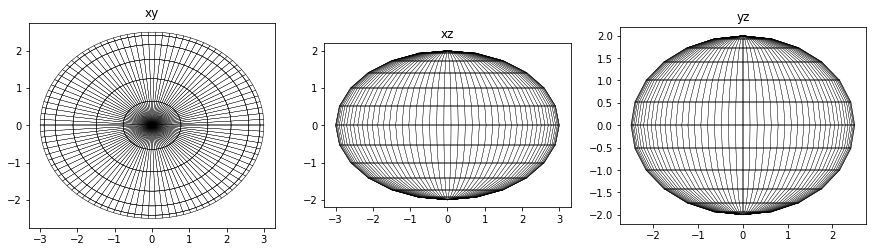

In [14]:
Plot3 (PP)

## Rotation um die x-Achse

In [15]:
def Rx (phi):
    t = np.pi * phi / 180
    c = np.cos (t)
    s = np.sin (t)
    return np.array ([
        [1, 0,  0, 0],
        [0, c, -s, 0],
        [0, s,  c, 0],
        [0, 0,  0, 1]
    ])

In [16]:
A = Rx (30)
print (A)

[[ 1.         0.         0.         0.       ]
 [ 0.         0.8660254 -0.5        0.       ]
 [ 0.         0.5        0.8660254  0.       ]
 [ 0.         0.         0.         1.       ]]


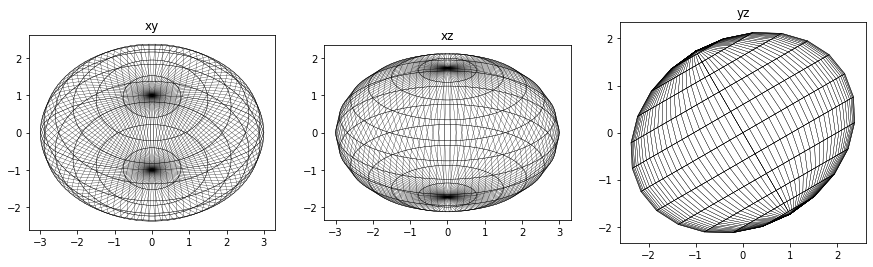

In [17]:
Plot3 (Transform (A, PP))

## Rotation um die y-Achse

In [18]:
def Ry (phi):
    t = np.pi * phi / 180
    c = np.cos (t)
    s = np.sin (t)
    return np.array ([
        [ c, 0, s, 0],
        [ 0, 1, 0, 0],
        [-s, 0, c, 0],
        [ 0, 0, 0, 1]
    ])

In [19]:
A = Ry (30)
print (A)

[[ 0.8660254  0.         0.5        0.       ]
 [ 0.         1.         0.         0.       ]
 [-0.5        0.         0.8660254  0.       ]
 [ 0.         0.         0.         1.       ]]


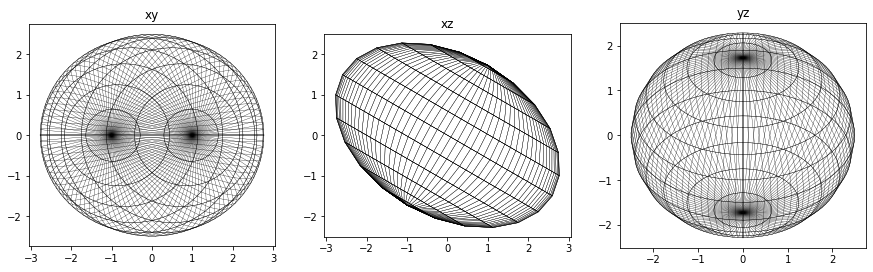

In [20]:
Plot3 (Transform (A, PP))

## Rotation um die z-Achse

In [21]:
def Rz (phi):
    t = np.pi * phi / 180
    c = np.cos (t)
    s = np.sin (t)
    return np.array ([
        [c, -s, 0, 0],
        [s,  c, 0, 0],
        [0,  0, 1, 0],
        [0,  0, 0, 1]
    ])

In [22]:
A = Rz (30)

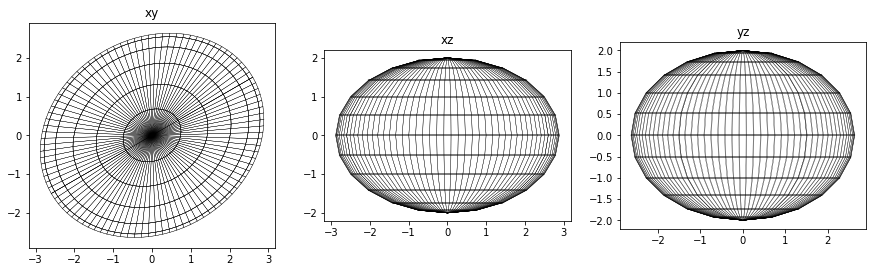

In [23]:
Plot3 (Transform (A, PP))

## Rotation um eine beliebige Achse

In [24]:
a = Vec3 (2, 3, 5)
print (a)

[[2]
 [3]
 [5]]


In [25]:
a = a / np.sqrt (a.T @ a)
print (a)

[[0.32444284]
 [0.48666426]
 [0.81110711]]


In [26]:
def Dyad (a):
    return (a @ a.T)

print (Dyad (a))

[[0.10526316 0.15789474 0.26315789]
 [0.15789474 0.23684211 0.39473684]
 [0.26315789 0.39473684 0.65789474]]


In [27]:
def Skew (a):
    return np.array ([
        [  0,        - a [2, 0],   a [1,0 ]], 
        [  a [2, 0],   0,        - a [0,0 ]], 
        [- a [1, 0],   a [0, 0],   0       ]
    ])

print (Skew (a))

[[ 0.         -0.81110711  0.48666426]
 [ 0.81110711  0.         -0.32444284]
 [-0.48666426  0.32444284  0.        ]]


In [28]:
def R (a, phi):
    a = a [:3]
    a = a / np.sqrt (a.T @ a)
    t = np.pi * phi / 180
    c = np.cos (t)
    s = np.sin (t)
    m = np.eye (4)
    m [:3, :3] = c * np.eye (3) + (1 - c) * Dyad (a) + s * Skew (a)
    return m

A = R (Vec3 (1, 1, 1), 30)
A = R (Vec3 (0, 0, 1), 30)
print (A)

[[ 0.8660254 -0.5        0.         0.       ]
 [ 0.5        0.8660254  0.         0.       ]
 [ 0.         0.         1.         0.       ]
 [ 0.         0.         0.         1.       ]]


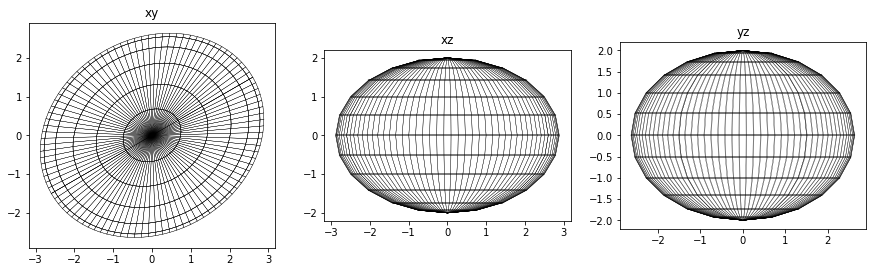

In [29]:
Plot3 (Transform (A, PP))